## Self coding the univariate gradient decent 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib nbagg

<IPython.core.display.Javascript object>


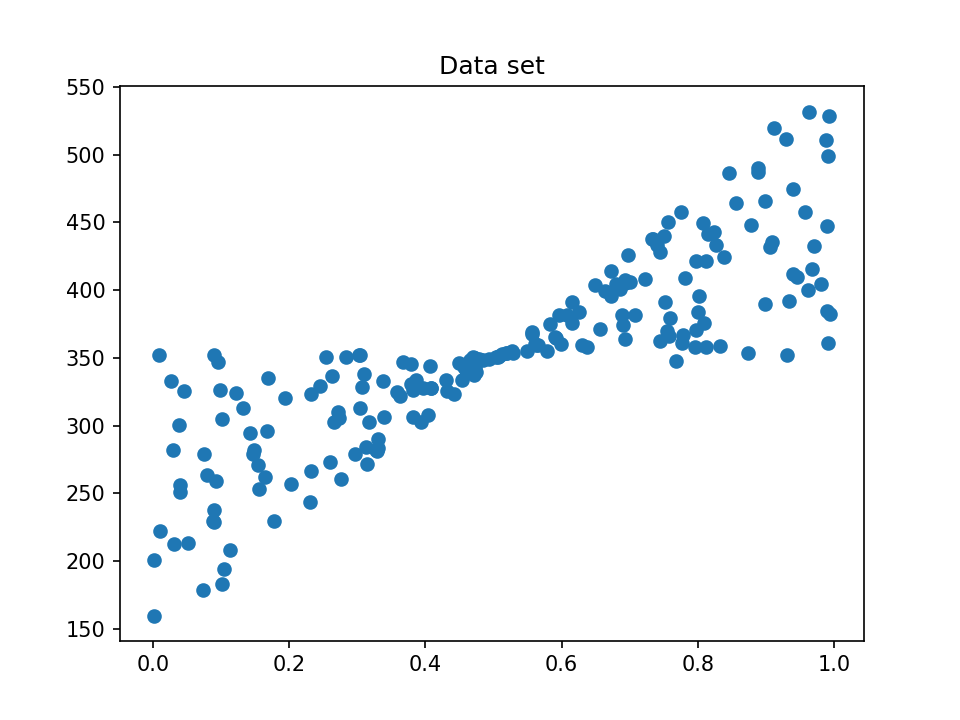

In [10]:
#generate data set
# y = 200x + 150

w_true = 200
b_true = 150

m = 200  #number of data points
x = np.random.rand(m)
y = w_true * x + b_true 
#adding some noise centered arround corners
g =  (0.2  *  (2*(np.random.rand(m)-0.5)) * (y-y.mean())*2)
y += (1-g/abs(g).max())*100

#show data
fig,ax1 = plt.subplots(1)
ax1.scatter(x,y)
plt.title("Data set")
plt.show()

In [13]:
#finding the best fit

w=0
b=0
lr = 2.0e-3
iterations = 100000

history = []

for i in range(iterations):
    
    #show cost
    j = np.sum((w*x+b-y)**2)/(2*m)
    #print(f"iteration : {i} & cost: {j}")
    
    dw = np.sum((w*x+b-y)*x)/m
    db = np.sum(w*x+b-y)/m
    
    w -= lr * dw
    b -= lr * db
    
    history.append((w,b))
    #print(f"w: {w} & b: {b}")
    #print("----")

print("final")
print(f"w: {w} & b: {b}")
    
    
    

final
w: 204.48808719043814 & b: 247.75272626496783


In [14]:
import ipywidgets as widgets
import IPython.display as ipd


## Making a slider to see how the prediction function changed overtime (Timeline)

<IPython.core.display.Javascript object>


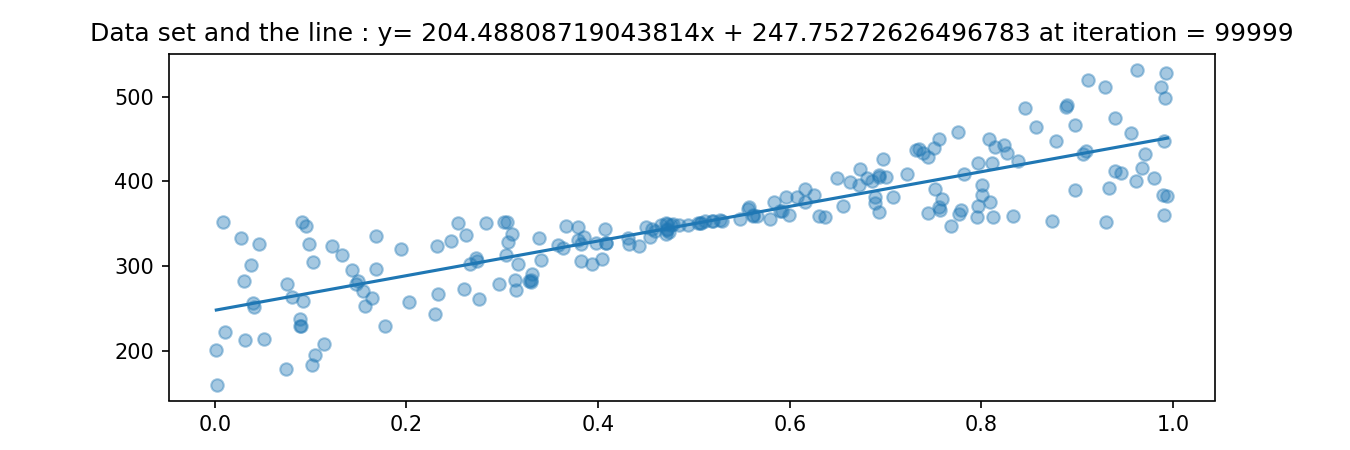

interactive(children=(FloatSlider(value=1.0, description='Select the time:', min=1.0), Output()), _dom_classes…

In [15]:
def update_plot(interested_time_index):
    gamma = 5
    time_index = int((interested_time_index/100)**gamma * (len(history)-1)) if interested_time_index!=100 else len(history)-1
    
    w_,b_ = history[time_index]
    #get minimum and maximum x in data set
    x_ = np.array(x)

    
    
    #show data
    ax.clear()
    ax.scatter(x,y,alpha=0.4)
    
    ax.plot(np.array([x_.min(),x_.max()]),np.array([x_.min(),x_.max()])*w_ + b_)
    
    
    plt.title(f"Data set and the line : y= {w_}x + {b_} at iteration = {time_index}")
    plt.show()

fig,ax = plt.subplots(1,figsize=(9,3))
interested_time_index = widgets.FloatSlider(description="Select the time:",max=100,min=1)
widgets.interactive(update_plot,interested_time_index=interested_time_index)

## Multiple linear regression - coding

In [112]:
#multi dot function is usefulll!!!
g = np.array([1,2,3])
h = np.array([[1,2,3],
             [4,5,6]])

np.linalg.multi_dot((h,g))

array([14, 32])

In [7]:
# y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

#generate data set
w1_true = 100
w2_true = 200
w3_true = 300
w4_true = 400
w5_true = 500
b_true  = 600

m = 100#length of the data set
x = np.random.rand(m,5)
w_true = np.array([w1_true,w2_true,w3_true,w4_true,w5_true])
y=np.linalg.multi_dot((x,w_true)) + b_true

#we cannot plt this (bcz there are five feature axises needed)







In [8]:
#multiple :: gradient decent

w = np.random.rand(5)
b = 0
lr =1.0e-2

iterations = 100000
for i in range(iterations):
    for j in range(5):
        w[j] -= lr * (1/m) * np.dot((np.linalg.multi_dot((x,w)) + b - y),x[:,j])
    b -= lr * (1/m) * (np.linalg.multi_dot((x,w)) + b - y).sum()
    
print("final")
print(f"w = {w}")
print(f"b = {b}")
    

final
w = [100. 200. 300. 400. 500.]
b = 599.9999999998366
